# Scikit Learn et données

Scikit-learn propose quelques ensembles de données, notamment [iris](http://en.wikipedia.org/wiki/Iris_flower_data_set) et [digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) (classification) et le [boston house prices dataset](http://archive.ics.uci.edu/ml/datasets/Housing) (regression).

Exercice : en trouvez d'autres...

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
digits = datasets.load_digits()
boston = datasets.load_boston()

Un dataset ressemble à un `dict`.  Explorez les membres suivants (e.g., `iris.DESCR`) :
* `data`
* `target`
* `feature_names`
* `DESCR`


En anglais (pour correspondre aux noms des fonctions) : "We fit an estimator to the data to predict the classes to which unseen samples belong".  Donc, un `estimator` implemente les méthode `fit(X, y)` et `predit(T)`.

Le constructeur d'un estimateur accepte les paramètes du modèle.
Il est également possible de changer les paramètes après création.

In [2]:
from sklearn import svm

model = svm.SVC(gamma=0.002, C=100.)
print(model.gamma)
model.set_params(gamma=.001)
print(model.gamma)
model.fit(digits.data[:-1], digits.target[:-1])
model.predict(digits.data[-1])

0.002
0.001


array([8])

Nous pouvons regarder l'image.

* Qu'est-ce qui est l'effet de `cmap`?

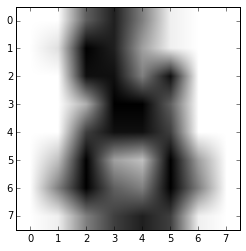

In [3]:
import pylab as pl
%matplotlib inline

pl.imshow(digits.images[-1], cmap=pl.cm.gray_r)

À savoir (mais pour un autre jour) :
* pickle marche
* `sklearn.externals.joblib` est parfois plus efficace

Un estimator prend un ensemble de données, typiquement un array de dimension 2 (`np.ndarray`, cf. `.shape`).

Regardons les iris :
* Il y a combien de classes d'iris?
* Il y a combien de vecteurs dans le training data?
* Il y a combien de dimensions?

In [4]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

Le classifieur le plus simple imagineable s'appelle kNN.  Avec scikit-learn, c'est facile.  (Visualisaton à suivre.)

Le nombre de dimensions peut monter très vite, ce qui pose des problèmes pour kNN.
* Il y a combien de point sur une lattice espacés de $1/n$ en dimension 1, 2, 3, ..., n ?
* Qu'est-ce qui est la distance entre 0 et 1 (les vecteurs des coins opposés) dans $[0,1]^d$?

In [5]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 
print(knn.predict(iris_X_test))
print(iris_y_test)
knn.score(iris_X_test, iris_y_test)

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


0.90000000000000002

La régression logistique est un algorithm important de classification dans l'apprentissage.  Le voilà sur les mêmes données :

In [6]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)
print(logistic.predict(iris_X_test))
print(iris_y_test)
logistic.score(iris_X_test, iris_y_test)

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


0.90000000000000002

Exercice :
* Pourquoi sont les scores les mêmes dans les deux exemples précédents?
* À quoi sert le score?

In [7]:
scores = []
for k in range(10):
    indices = np.random.permutation(len(iris_X))
    iris_X_train = iris_X[indices[:-10]]
    iris_y_train = iris_y[indices[:-10]]
    iris_X_test  = iris_X[indices[-10:]]
    iris_y_test  = iris_y[indices[-10:]]
    
    knn = KNeighborsClassifier()
    knn.fit(iris_X_train, iris_y_train) 
    scores.append(knn.score(iris_X_test, iris_y_test))
print(scores)

[0.90000000000000002, 0.90000000000000002, 1.0, 0.90000000000000002, 1.0, 1.0, 0.69999999999999996, 1.0, 1.0, 1.0]


In [8]:
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')

N = 10
X_folds = np.array_split(X_digits, N)
y_folds = np.array_split(y_digits, N)
scores = list()
for k in range(N):
     # We use 'list' to copy, in order to 'pop' later on
     X_train = list(X_folds)
     X_test  = X_train.pop(k)
     X_train = np.concatenate(X_train)
     y_train = list(y_folds)
     y_test  = y_train.pop(k)
     y_train = np.concatenate(y_train)
     scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
scores

[0.93888888888888888,
 0.99444444444444446,
 0.93333333333333335,
 0.96666666666666667,
 0.96111111111111114,
 0.98888888888888893,
 0.96666666666666667,
 0.98882681564245811,
 0.93296089385474856,
 0.96648044692737434]

Ce qu'on vient de faire s'appelle "cross validation" (validation croisée).  On peut le faire plus facilement :

In [9]:
from sklearn import cross_validation

k_fold = cross_validation.KFold(n=6, n_folds=3)
for train_indices, test_indices in k_fold:
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


In [10]:
kfold = cross_validation.KFold(len(X_digits), n_folds=N)
[svc.fit(X_digits[train], y_digits[train]).score(
        X_digits[test], y_digits[test])
 for train, test in kfold]

[0.93888888888888888,
 0.99444444444444446,
 0.93333333333333335,
 0.96666666666666667,
 0.96111111111111114,
 0.98888888888888893,
 0.96666666666666667,
 0.98882681564245811,
 0.93296089385474856,
 0.96648044692737434]

In [11]:
cross_validation.cross_val_score(
    svc, X_digits, y_digits, cv=kfold, n_jobs=-1)

array([ 0.93888889,  0.99444444,  0.93333333,  0.96666667,  0.96111111,
        0.98888889,  0.96666667,  0.98882682,  0.93296089,  0.96648045])

En validation croisée, plus c'est grand, plus c'est bon.

À voir également :
* KFold
* StratifiedKFold
* LeaveOneOut
* LeaveOneLabelOut

## Estimation d'un paramètre

Nous voudrions trouver quelle valeur du paramètre $C$ nous donne un bon rendu de SVM avec noyau linéaire.  Pour l'instant, on ne parle ni de SVM ni des noyaux : ce sont simplement des classificateurs.  L'important ici est qu'il existe un paramètre $C$ qui touche sur la qualité de nos résultats.

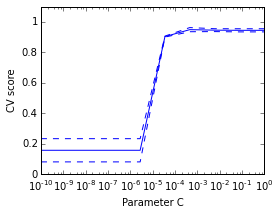

In [14]:
import numpy as np
from sklearn import cross_validation, datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_validation.cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

## Grid search

Note pour plus tard : Voir l'argument `cv`.  `GridSearch` fait 3-fold validation croisée pour la régression, stratified 3-fold pour un classificateur.

In [17]:
from sklearn.grid_search import GridSearchCV
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])
print(clf.best_score_)
print(clf.best_estimator_.C)

# Prediction performance on test set is not as good as on train set
print(clf.score(X_digits[1000:], y_digits[1000:]))

0.925
0.00774263682681
0.943538268507
